In [44]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

In [45]:
df_train = pd.read_csv("train.csv")

In [46]:
df = pd.read_csv("flights_sample_3m.csv")

In [47]:
df.sample(5)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
349208,2020-03-04,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,925,GRR,"Grand Rapids, MI",DTW,"Detroit, MI",...,0.0,62.0,48.0,26.0,120.0,NaN,NaN,NaN,NaN,NaN
2365359,2019-06-15,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2561,DCA,"Washington, DC",MDW,"Chicago, IL",...,0.0,120.0,113.0,94.0,601.0,NaN,NaN,NaN,NaN,NaN
202683,2021-11-17,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,135,MSP,"Minneapolis, MN",MCO,"Orlando, FL",...,0.0,201.0,202.0,170.0,1310.0,NaN,NaN,NaN,NaN,NaN
1041244,2020-03-26,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,836,IND,"Indianapolis, IN",CLT,"Charlotte, NC",...,0.0,100.0,NaN,NaN,427.0,NaN,NaN,NaN,NaN,NaN
115436,2023-08-08,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1767,MCO,"Orlando, FL",STL,"St. Louis, MO",...,0.0,145.0,153.0,130.0,882.0,NaN,NaN,NaN,NaN,NaN


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED                float64
 21  CANCELLA

In [49]:
df.isnull().sum()

FL_DATE                          0
AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER   

# Price of charges based on these features age sex children smoker target charges 

In [50]:
df_insurance = pd.read_csv("insurance.csv",usecols=['age', 'sex', 'children', 'smoker', 'charges'])

In [51]:
df_insurance.sample(5)

,age,sex,children,smoker,charges
989,24,female,0,yes,14571.89080
252,54,male,2,yes,44260.74990
893,47,male,2,yes,44202.65360
403,49,male,3,no,10269.46000
291,29,male,1,no,20277.80751


In [52]:
df_insurance.columns

Index(['age', 'sex', 'children', 'smoker', 'charges'], dtype='object')

In [53]:
df_insurance.isnull().sum()

age         0
sex         0
children    0
smoker      0
charges     0
dtype: int64

In [54]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 52.4+ KB


In [55]:
df_insurance.describe()

,age,children,charges
count,1338.000000,1338.000000,1338.000000
mean,39.207025,1.094918,13270.422265
std,14.049960,1.205493,12110.011237
min,18.000000,0.000000,1121.873900
25%,27.000000,0.000000,4740.287150
50%,39.000000,1.000000,9382.033000
75%,51.000000,2.000000,16639.912515
max,64.000000,5.000000,63770.428010


<Axes: ylabel='Frequency'>

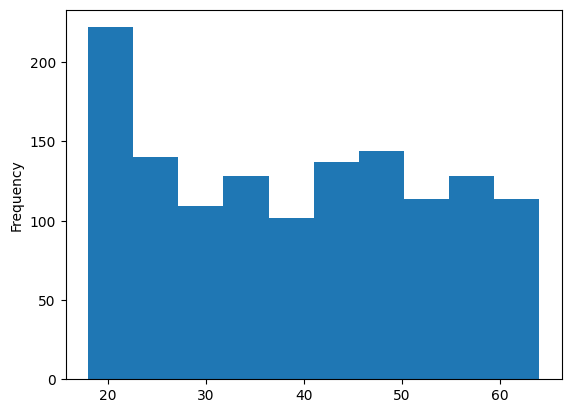

In [56]:
df_insurance['age'].plot(kind='hist')

<Axes: ylabel='Frequency'>

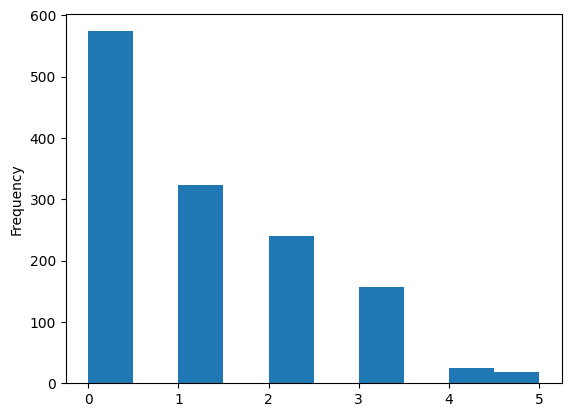

In [57]:
df_insurance['children'].plot(kind='hist')

C:\Users\A\AppData\Local\Temp\ipykernel_1796\253357758.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_insurance['age'])


<Axes: xlabel='age', ylabel='Density'>

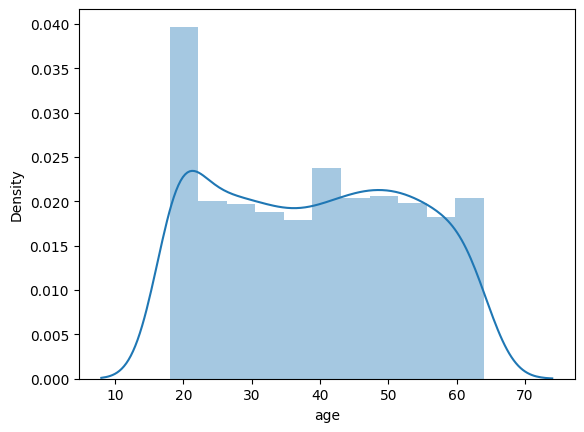

In [58]:
sns.distplot(df_insurance['age'])

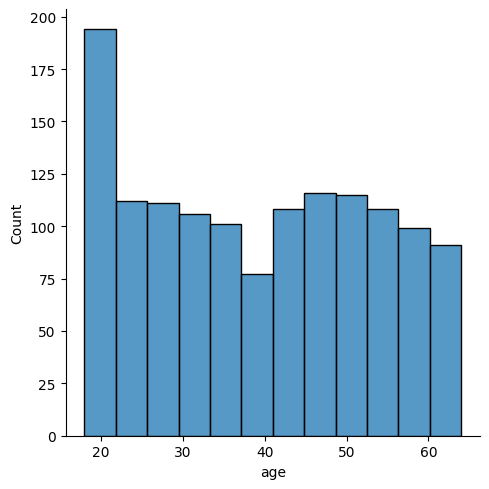

In [59]:
sns.displot(df_insurance['age'])

C:\Users\A\AppData\Local\Temp\ipykernel_1796\2287666666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_insurance['children'])


<Axes: xlabel='children', ylabel='Density'>

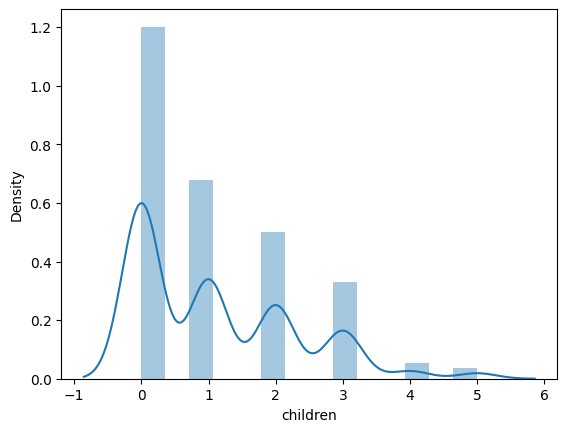

In [60]:
sns.distplot(df_insurance['children'])

<Axes: ylabel='age'>

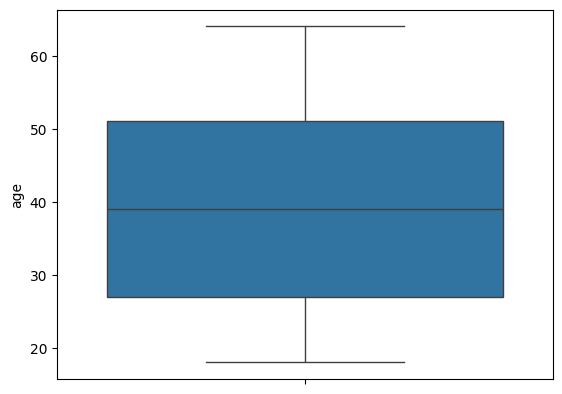

In [61]:
sns.boxplot(df_insurance['age'])

<Axes: ylabel='children'>

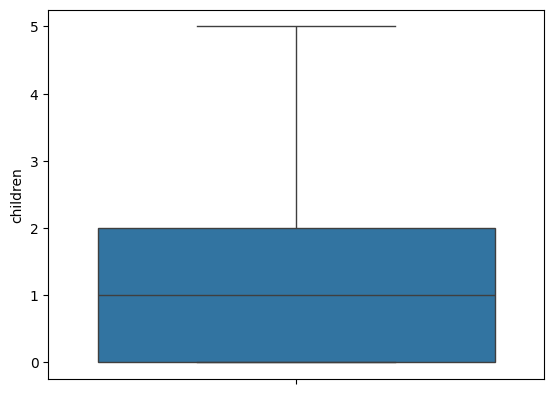

In [62]:
sns.boxplot(df_insurance['children'])

# Bivariate

<Axes: xlabel='children', ylabel='age'>

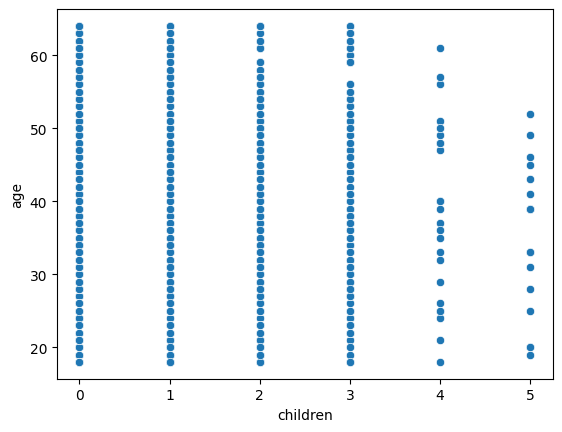

In [63]:
sns.scatterplot(x='children',y='age',data=df_insurance)

<Axes: xlabel='children', ylabel='age'>

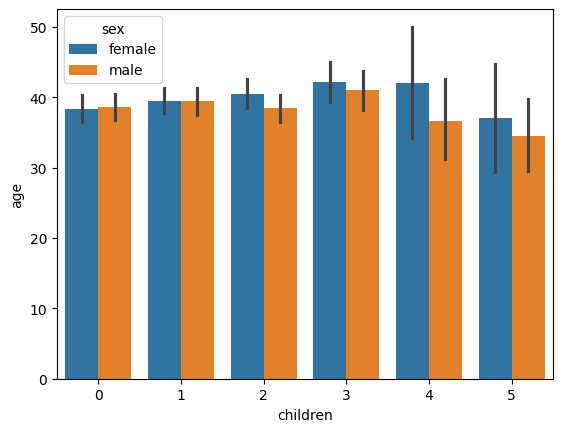

In [64]:
sns.barplot(x='children',y='age',hue='sex',data=df_insurance)

C:\Users\A\AppData\Local\Temp\ipykernel_1796\2593307838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_insurance['age'],hist=False)
C:\Users\A\AppData\Local\Temp\ipykernel_1796\2593307838.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_insurance['children'],hist=

<Axes: xlabel='children', ylabel='Density'>

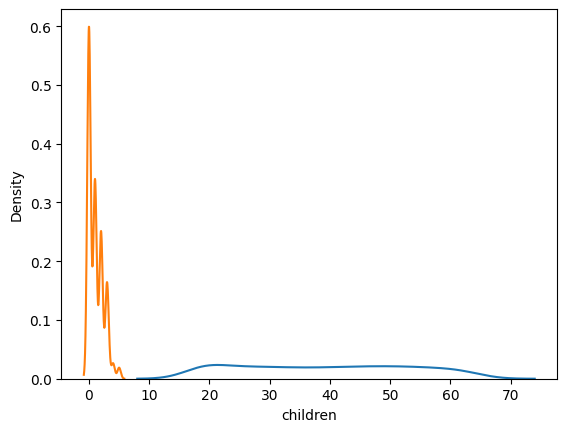

In [65]:
sns.distplot(df_insurance['age'],hist=False)
sns.distplot(df_insurance['children'],hist=False)

In [66]:
df_insurance.dtypes

age           int64
sex          object
children      int64
smoker       object
charges     float64
dtype: object

In [67]:
df_insurance.select_dtypes(['float64','int64']).corr()

,age,children,charges
age,1.000000,0.042469,0.299008
children,0.042469,1.000000,0.067998
charges,0.299008,0.067998,1.000000


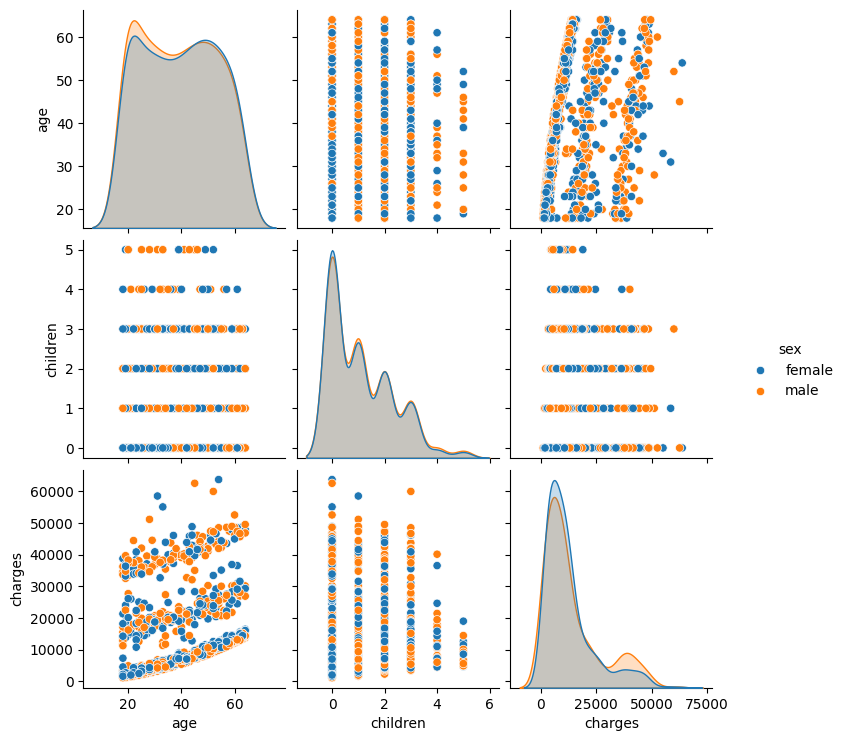

In [68]:
sns.pairplot(df_insurance,hue='sex')

<Axes: xlabel='children', ylabel='charges'>

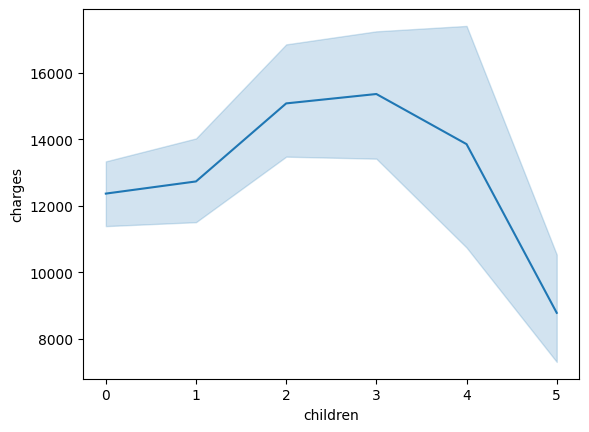

In [69]:
sns.lineplot(x='children',y='charges',data=df_insurance)

In [70]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 52.4+ KB


In [71]:
x_train,x_test,y_train,y_test = train_test_split(df_insurance.iloc[:,0:4],df_insurance.iloc[:,-1],test_size=0.3,random_state=42)

In [72]:
x_train.count()

age         936
sex         936
children    936
smoker      936
dtype: int64

In [73]:
x_test.count()

age         402
sex         402
children    402
smoker      402
dtype: int64

In [74]:
type(x_train)

pandas.core.frame.DataFrame

In [75]:
x_test.count()

age         402
sex         402
children    402
smoker      402
dtype: int64

In [76]:
type(y_test)

pandas.core.series.Series

In [77]:
y_train.count()

936

In [78]:
y_test.count()

402

In [79]:
df_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   children  1338 non-null   int64  
 3   smoker    1338 non-null   object 
 4   charges   1338 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 52.4+ KB


In [80]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 936 entries, 332 to 1126
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       936 non-null    int64 
 1   sex       936 non-null    object
 2   children  936 non-null    int64 
 3   smoker    936 non-null    object
dtypes: int64(2), object(2)
memory usage: 36.6+ KB


In [81]:
trf1 = ColumnTransformer([
    ('sex_smoker_ohe',OneHotEncoder(),[1,3])
],remainder='passthrough')

In [82]:
trf2= ColumnTransformer([
    ('age_scale',MinMaxScaler(),[0])
],remainder='passthrough')

In [83]:
trf3 = ColumnTransformer([
    ('age_normalize',FunctionTransformer(func=np.log1p),[0])
],remainder='passthrough')

In [84]:
trf4 = LinearRegression()


In [85]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2),
    ('trf3',trf3),
    ('trf4',trf4),
])

In [86]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('sex_smoker_ohe',
                                                  OneHotEncoder(), [1, 3])])),
                ('trf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_scale', MinMaxScaler(),
                                                  [0])])),
                ('trf3',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('age_normalize',
                                                  FunctionTransformer(func=<ufunc 'log1p'>),
                                                  [0])])),
                ('trf4', LinearRegression())])

In [87]:
cross_val_score(pipe,x_train,y_train,cv=10)

array([0.70136131, 0.77515996, 0.75976664, 0.78751991, 0.55823844,
       0.63580112, 0.62991906, 0.67242794, 0.73826368, 0.72119578])

In [88]:
y_predict = pipe.predict(x_test)

In [89]:
mean_squared_error(y_test,y_pred=y_predict)

37424846.75580809

In [90]:
mean_absolute_error(y_test,y_predict)

3944.4831231855937

In [91]:
r2_score(y_test,y_predict)

0.7447568735817551